In [1]:
# !pip install doit papermill pandas hvplot matplotlib

In [2]:
from doit import load_ipython_extension
load_ipython_extension()
import pandas as pd
import hvplot.pandas

In [3]:
import sys
sys.path.append('src')
import sciebo

sciebo.download_file('https://uni-bonn.sciebo.de/s/N8t6uo4mn6itdtG', 'data/steinmetz_all.csv')

# Building Workflows in Notebook

Pydoit is a task management and automation tool designed to execute commands and scripts in a structured, reproducible way.
In this notebook, we will understand the structure of `doit` workflows by writing doit tasks and execute them.

## Functions

Functions are reusable blocks of code that perform a specific task. 
They help organize code, make it more readable, and allow you to avoid repetition by encapsulating logic that can be called multiple times throughout a program.

A function is defined using the def keyword followed by the function name and parentheses `()`. 
The code that performs the task is placed inside the function body, indented under the function definition

```python
def function_name(param1, param2, ...):  
    # use param1, param2, ...
    return value  # return (optional)
```

**Example** Make a function called `active_trials` the replaces the below code

```python
input_csv = 'data/steinmetz_all.csv'
output_csv = 'data/active_trials.csv'
df = pd.read_csv(input_csv)
df_active = df[df['active_trials'] == True]
df_active.to_csv(output_csv, index=False)
```

In [4]:
def active_trials():
    input_csv = 'data/steinmetz_all.csv'
    output_csv = 'data/active_trials.csv'
    df = pd.read_csv(input_csv)
    df_active = df[df['active_trials'] == True]
    df_active.to_csv(output_csv, index=False)    

active_trials()

Make a function called `descriptive_stats` that replaces the below code

```python
active_trials_csv = 'data/active_trials.csv'
stats_csv = 'data/stats.csv'
df = pd.read_csv(active_trials_csv)
df_stats = df.describe().reset_index()
df_stats.to_csv(stats_csv, index=False)
```

In [5]:
def descriptive_stats():
    active_trials_csv = 'data/active_trials.csv'
    stats_csv = 'data/stats.csv'
    df = pd.read_csv(active_trials_csv)
    df_stats = df.describe().reset_index()
    df_stats.to_csv(stats_csv, index=False)

descriptive_stats()    

c:\Users\sangeetha\anaconda3\envs\ndd\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\sangeetha\anaconda3\envs\ndd\Lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Make a function called `histogram_plot` that replaces the code below

```python
import matplotlib.pyplot as plt
active_trials_csv = 'data/active_trials.csv'
hist_col_name = 'response_time'
df = pd.read_csv(active_trials_csv)
df[hist_col_name].plot.hist()
plt.savefig(f'{hist_col_name}_histogram.png')
```

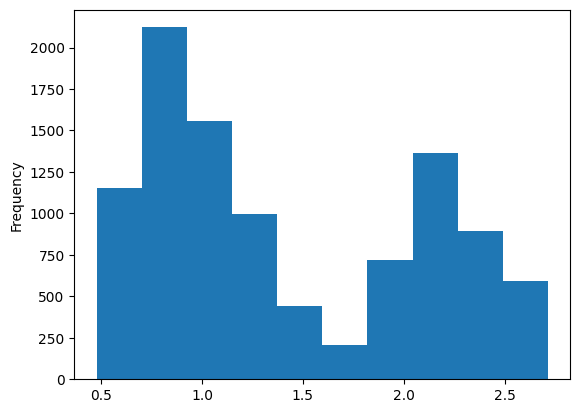

In [6]:
def histogram_plot():
    import matplotlib.pyplot as plt
    active_trials_csv = 'data/active_trials.csv'
    hist_col_name = 'response_time'
    df = pd.read_csv(active_trials_csv)
    df[hist_col_name].plot.hist()
    plt.savefig(f'{hist_col_name}_histogram.png')

histogram_plot()

Make `input_csv` as a parameter for `active_trials`

In [7]:
def active_trials(input_csv):
    output_csv = 'data/active_trials.csv'
    df = pd.read_csv(input_csv)
    df_active = df[df['active_trials'] == True]
    df_active.to_csv(output_csv, index=False)    

active_trials('data/steinmetz_all.csv')

Make `active_trials_csv` as a parameter of `descriptive_stats`

In [8]:
def descriptive_stats(active_trials_csv):
    stats_csv = 'data/stats.csv'
    df = pd.read_csv(active_trials_csv)
    df_stats = df.describe().reset_index()
    df_stats.to_csv(stats_csv, index=False)

descriptive_stats('data/active_trials.csv')    

c:\Users\sangeetha\anaconda3\envs\ndd\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\sangeetha\anaconda3\envs\ndd\Lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Make `active_trials_csv` as a parameter of `histogram_plot`

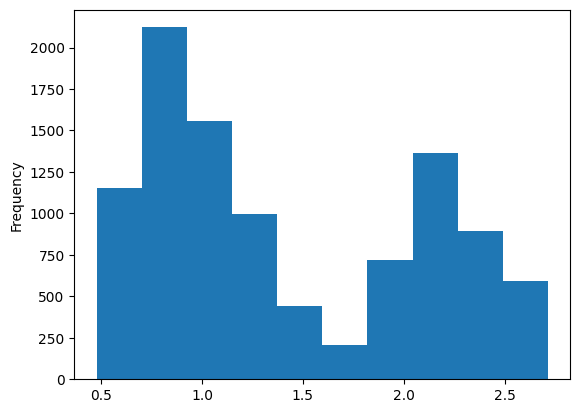

In [9]:
def histogram_plot(active_trials_csv):
    import matplotlib.pyplot as plt
    hist_col_name = 'response_time'
    df = pd.read_csv(active_trials_csv)
    df[hist_col_name].plot.hist()
    plt.savefig(f'{hist_col_name}_histogram.png')

histogram_plot('data/active_trials.csv')

**Example** Make `input_csv` and `output_csv` as parameters for `active_trials`

In [10]:
def active_trials(input_csv, output_csv):
    df = pd.read_csv(input_csv)
    df_active = df[df['active_trials'] == True]
    df_active.to_csv(output_csv, index=False)    

active_trials('data/steinmetz_all.csv', 'data/active_trials.csv')

Make `active_trials_csv` and `stats_csv` as parameters of `descriptive_stats`

In [11]:
def descriptive_stats(active_trials_csv, stats_csv):
    df = pd.read_csv(active_trials_csv)
    df_stats = df.describe().reset_index()
    df_stats.to_csv(stats_csv, index=False)

descriptive_stats('data/active_trials.csv', 'data/stats.csv')    

c:\Users\sangeetha\anaconda3\envs\ndd\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\sangeetha\anaconda3\envs\ndd\Lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Make `active_trials_csv` and `stats_csv` as parameters of `histogram_plot`

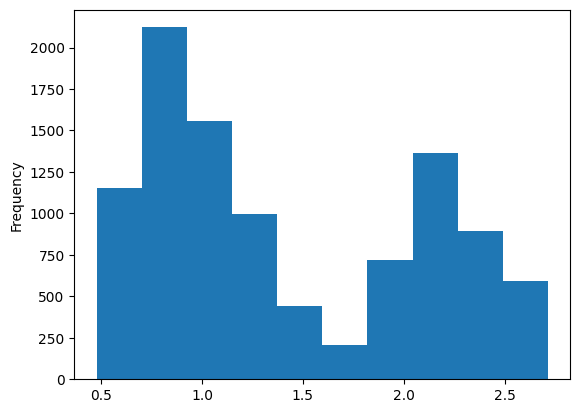

In [12]:
def histogram_plot(active_trials_csv, hist_col_name):
    import matplotlib.pyplot as plt
    df = pd.read_csv(active_trials_csv)
    df[hist_col_name].plot.hist()
    plt.savefig(f'{hist_col_name}_histogram.png')

histogram_plot('data/active_trials.csv', 'response_time')

## Building doit Workflows

`doit` is a task automation tool that helps manage dependencies and execute tasks. `doit` workflows are made up of units called `tasks` which are python functions. 

Basic syntax of doit task:

```python
def task_name():
    return {
        'actions': ['command to execute'],
    }
```

`task_name` is name of the task (must start with `task_`)

`actions` is a list of commands, Python functions, etc.

Let's get some practice building `doit` tasks.

**Example** Add a doit task called `process` that implements the below code:

```python
def active_trials():
    input_csv = 'data/steinmetz_all.csv'
    output_csv = 'data/active_trials.csv'
    df = pd.read_csv(input_csv)
    df_active = df[df['active_trials'] == True]
    df_active.to_csv(output_csv, index=False)   
```

In [13]:
def task_process():
    def active_trials():
        input_csv = 'data/steinmetz_all.csv'
        output_csv = 'data/active_trials.csv'
        df = pd.read_csv(input_csv)
        df_active = df[df['active_trials'] == True]
        df_active.to_csv(output_csv, index=False)       

    return {
        'actions': [active_trials]
    }

In [14]:
%doit list

process   


Add a doit task called `stats` for the below code

In [15]:
def task_stats():
    def descriptive_stats():
        active_trials_csv = 'data/active_trials.csv'
        stats_csv = 'data/stats.csv'
        df = pd.read_csv(active_trials_csv)
        df_stats = df.describe().reset_index()
        df_stats.to_csv(stats_csv, index=False)
    
    return {
        'actions': [descriptive_stats]
    }

In [16]:
%doit list

process   
stats     


Add a doit task called `plot` for the below code

```python
def histogram_plot():
    import matplotlib.pyplot as plt
    active_trials_csv = 'data/active_trials.csv'
    hist_col_name = 'response_time'
    df = pd.read_csv(active_trials_csv)
    df[hist_col_name].plot.hist()
    plt.savefig(f'{hist_col_name}_histogram.png')
```

In [17]:
def task_plot():
    def histogram_plot():
        import matplotlib.pyplot as plt
        active_trials_csv = 'data/active_trials.csv'
        hist_col_name = 'response_time'
        df = pd.read_csv(active_trials_csv)
        df[hist_col_name].plot.hist()
        plt.savefig(f'{hist_col_name}_histogram.png')    
    
    return {
        'actions': [histogram_plot]
    }

In [18]:
%doit list

plot      
process   
stats     


We can also run notebooks as a `doit` task. Run the below cell to download notebooks.

`nb_active_trials`: Same as `active_trials` function </br>
`nb_stats`: Same as `descriptive_stats` function </br>
`nb_plots`: Same as `histogram_plot` function

In [19]:
import sys
sys.path.append('src')
import sciebo

sciebo.download_file('https://uni-bonn.sciebo.de/s/5ke7GSFfMErS20y', 'nb_active_trials.ipynb')
sciebo.download_file('https://uni-bonn.sciebo.de/s/UQKaks9opGYu211', 'nb_stats.ipynb')
sciebo.download_file('https://uni-bonn.sciebo.de/s/dFomib4RDkGL39A', 'nb_plots.ipynb')


**Example** Run `nb_active_trials` notebook inside process task.

In [20]:
def task_process():
    return {
        'actions': ['papermill nb_active_trials.ipynb process.ipynb']
    }

Run `nb_stats` notebook inside stats task.

In [21]:
def task_stats():
    return {
        'actions': ['papermill nb_stats.ipynb stats.ipynb']
    }

Run `nb_plots` notebook inside `plot` task

In [22]:
def task_plot():  
    return {
        'actions': ['papermill nb_plots.ipynb plots.ipynb']
    }

## Running `doit` tasks

Now that we know how to make doit tasks, let see how to run them.

**Delete `data` directory and run the below cell to get only `steinmetz_all.csv`**

In [23]:
import sys
sys.path.append('src')
import sciebo

sciebo.download_file('https://uni-bonn.sciebo.de/s/N8t6uo4mn6itdtG', 'data/steinmetz_all.csv')

**Example** Run `process` task

In [24]:
%doit process

.  process


Input Notebook:  nb_active_trials.ipynb
Output Notebook: process.ipynb
Executing: 100%|██████████| 9/9 [00:02<00:00,  3.30cell/s]


Run `stats` task

In [25]:
%doit stats

.  stats


Input Notebook:  nb_stats.ipynb
Output Notebook: stats.ipynb
Executing: 100%|██████████| 10/10 [00:02<00:00,  3.66cell/s]


Run `plot` task

In [26]:
%doit plot

.  plot


Input Notebook:  nb_plots.ipynb
Output Notebook: plots.ipynb
Executing: 100%|██████████| 9/9 [00:03<00:00,  2.90cell/s]


`doit` does not enforce a specific order of task execution unless task dependencies are explicitly defined. By default, tasks are executed in parallel or in whatever order doit chooses, which might not match the logical order you expect.

**Delete `data` directory and run the below cell to get only `steinmetz_all.csv`**

In [27]:
import sys
sys.path.append('src')
import sciebo

sciebo.download_file('https://uni-bonn.sciebo.de/s/N8t6uo4mn6itdtG', 'data/steinmetz_all.csv')



**Example** Run everything (Can you?)

In [28]:
%doit

.  plot


Input Notebook:  nb_plots.ipynb
Output Notebook: plots.ipynb
Executing: 100%|██████████| 9/9 [00:03<00:00,  2.85cell/s]


.  process


Input Notebook:  nb_active_trials.ipynb
Output Notebook: process.ipynb
Executing: 100%|██████████| 9/9 [00:02<00:00,  3.43cell/s]


.  stats


Input Notebook:  nb_stats.ipynb
Output Notebook: stats.ipynb
Executing: 100%|██████████| 10/10 [00:02<00:00,  3.63cell/s]


**Example** Specify that `plot` task depends on `process` task

In [29]:
def task_plot():  
    return {
        'actions': ['papermill nb_plots.ipynb plots.ipynb'],
        'task_dep': ['process']

    }

In [30]:
%doit

.  process


Input Notebook:  nb_active_trials.ipynb
Output Notebook: process.ipynb
Executing: 100%|██████████| 9/9 [00:02<00:00,  3.15cell/s]


.  plot


Input Notebook:  nb_plots.ipynb
Output Notebook: plots.ipynb
Executing: 100%|██████████| 9/9 [00:03<00:00,  2.68cell/s]


.  stats


Input Notebook:  nb_stats.ipynb
Output Notebook: stats.ipynb
Executing: 100%|██████████| 10/10 [00:02<00:00,  3.61cell/s]


Specify that `stats` task depends on `process` task

In [31]:
def task_stats():
    return {
        'actions': ['papermill nb_stats.ipynb stats.ipynb'],
        'task_dep': ['process']
    }

In [32]:
%doit

.  process


Input Notebook:  nb_active_trials.ipynb
Output Notebook: process.ipynb
Executing: 100%|██████████| 9/9 [00:02<00:00,  3.43cell/s]


.  plot


Input Notebook:  nb_plots.ipynb
Output Notebook: plots.ipynb
Executing: 100%|██████████| 9/9 [00:03<00:00,  2.60cell/s]


.  stats


Input Notebook:  nb_stats.ipynb
Output Notebook: stats.ipynb
Executing: 100%|██████████| 10/10 [00:05<00:00,  1.77cell/s]
